## 5 其他神經網路的建構技術與應用
#### 大綱
    - Sequential指令回顧
    - 不同方式使用Sequential
    - 轉移學習範例與練習

## 5.1 Sequential回顧

* 建立神經網路前的預備概念：(1)程式碼、(2)神經網路模型、(3)權重數量

    - md =Sequential()
    - md.add(Dense(3, input_shape=(2,)))
    - md.summary
    - md.add(...)
    
* Sequential是將神經網路線性堆疊的建模方式

    - 優點：只需專注定義神經網路層
    - 缺點：無法單一修改一部份，需要全部重新定義

=>存在別的方式使用sequential，且可運用於轉移學習。

* 轉移學習-預訓練模型=>將已訓練的權重搬移至新的神經網路上。大幅加速運算速度。

## 5.2 彈性建構神經網路並建立轉移學習模型

### (1)初始準備

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Keras function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# Keras datasets
from keras.datasets import mnist

#Keras utilis function
from keras.utils import np_utils

### (2)導入資料

In [4]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [6]:
print("總共 %d 訓練資料，每筆資料尺寸 %d*%d" %x_train.shape)
print("總共 %d 測試資料，每筆資料尺寸 %d*%d" %x_test.shape)

總共 60000 訓練資料，每筆資料尺寸 28*28
總共 10000 測試資料，每筆資料尺寸 28*28


In [7]:
x_train[456]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
         53, 177, 253, 255, 253, 162,  21,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
x_train= x_train.reshape(60000, 784)
x_test= x_test.reshape(10000, 784)

x_train_01 =x_train[y_train<=1]
x_test_01 =x_test[y_test<=1]

#one-hot encoding
y_train_10=np_utils.to_categorical(y_train,10)
y_test_10=np_utils.to_categorical(y_test,10)

y_train_01=y_train[y_train<=1]
y_train_01=np_utils.to_categorical(y_train_01,2)

y_test_01=y_test[y_test<=1]
y_test_01=np_utils.to_categorical(y_test_01,2)

In [9]:
x_train_01.shape, x_test_01.shape

((12665, 784), (2115, 784))

In [10]:
y_train_01.shape, y_test_01.shape

((12665, 2), (2115, 2))

## (3) Sequential API

- 2 個隱藏層
- 每層500神經元
- 激活函數sigmoid

In [12]:
model=Sequential()

model.add(Dense(500,input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_4 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

### (3.1) 觀察神經網路層

In [15]:
model.layers
## 是否可以反過來將此分層list資料放進去建立神經網路

### (3.2) 以List使用Sequential API

In [17]:
first_layer=[Dense(500,input_dim=784),
             Activation('sigmoid')]
second_layer=[Dense(500),
             Activation('sigmoid')]
output_layer=[Dense(10),
             Activation('softmax')]

model =Sequential(first_layer + second_layer + output_layer)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_10 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_11 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

## (4) 情境題
手上存在手寫辨識模型，但今天想建立辨識0、1的模型，除了最後一層不一樣，其他結構一樣，該如何做？

In [18]:
all_except_layer=[Dense(500,input_dim=784),
                  Activation('sigmoid'),
                  Dense(500),
                  Activation('sigmoid')]

output_layer=[Dense(10),
              Activation('softmax')]

model_0to9=Sequential(all_except_layer+output_layer)
model_0to9.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_14 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_15 (Activation)   (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

In [19]:
# 讀取既有已知權重
model_0to9.load_weights('handwriting_model_weights.h5')

In [21]:
newoutput_layer=[Dense(2),
              Activation('softmax')]
model_0to1=Sequential(all_except_layer + newoutput_layer)
model_0to1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_14 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 1002      
_________________________________________________________________
activation_17 (Activation)   (None, 2)                 0         
Total params: 644,002
Trainable params: 644,002
Non-trainable params: 0
________________________________________________

In [22]:
for layer in all_except_layer:
    layer.trainable= False

In [24]:
model_0to1.summary()
# trainable params可見僅剩1002需要再訓練，其餘不會訓練到

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_14 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 1002      
_________________________________________________________________
activation_17 (Activation)   (None, 2)                 0         
Total params: 644,002
Trainable params: 1,002
Non-trainable params: 643,000
____________________________________________

In [28]:
model_0to1.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

## (5) 訓練轉移學習的神經網路

In [29]:
x_train_01.shape, y_train_01.shape

((12665, 784), (12665, 2))

In [30]:
model_0to1.fit(x_train_01, y_train_01, batch_size=100, epochs=5)

Epoch 1/5
12665/12665 [==============================] - 1s 117us/step - loss: 0.0170 - accuracy: 0.9788
Epoch 2/5
12665/12665 [==============================] - 1s 72us/step - loss: 0.0032 - accuracy: 0.9976
Epoch 3/5
12665/12665 [==============================] - 1s 75us/step - loss: 0.0027 - accuracy: 0.9979
Epoch 4/5
12665/12665 [==============================] - 1s 71us/step - loss: 0.0024 - accuracy: 0.9979
Epoch 5/5
12665/12665 [==============================] - 1s 68us/step - loss: 0.0022 - accuracy: 0.9981


In [31]:
score = model_0to1.evaluate(x_test_01, y_test_01)

2115/2115 [==============================] - 0s 182us/step


In [32]:
print("測試資料的loss:", score[0])
print("測試資料的正確率:", score[1])

測試資料的loss: 0.0012233133894836103
測試資料的正確率: 0.9990543723106384


## (6) 完成第一個轉移學習的神經網路模型
- 有無已知訓練好的模型權重？
Keras也提供針對部分資料庫已有訓練相當不錯的模型，可供轉移學習使用。詳情可參考Keras手冊。

## 5.3 轉移學習的練習

### (1)初始準備

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Keras function
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Keras datasets
from keras.datasets import mnist

#Keras utilis function
from keras.utils import np_utils

Using TensorFlow backend.


### (2)導入資料

In [5]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [6]:
print("總共 %d 訓練資料，每筆資料尺寸 %d*%d" %x_train.shape)
print("總共 %d 測試資料，每筆資料尺寸 %d*%d" %x_test.shape)

總共 60000 訓練資料，每筆資料尺寸 28*28
總共 10000 測試資料，每筆資料尺寸 28*28


In [7]:
x_train= x_train.reshape(60000,28,28,1)
x_test= x_test.reshape(10000,28,28,1)

x_train_01 =x_train[y_train<=1]
x_test_01 =x_test[y_test<=1]

#one-hot encoding
y_train_10=np_utils.to_categorical(y_train,10)
y_test_10=np_utils.to_categorical(y_test,10)

y_train_01=y_train[y_train<=1]
y_train_01=np_utils.to_categorical(y_train_01,2)

y_test_01=y_test[y_test<=1]
y_test_01=np_utils.to_categorical(y_test_01,2)

In [8]:
x_train_01.shape, x_test_01.shape

((12665, 28, 28, 1), (2115, 28, 28, 1))

In [9]:
y_train_01.shape, y_test_01.shape

((12665, 2), (2115, 2))

## (3) 回顧CNN圖形辨識模型

    - 三次C、P層
    - filter大小為3*3，max-pooling以2*2為區塊
    - filter數目越來越多(32、64、128)，做完convolution後，要拉平送到一般的Dense層，內有200個神經元。

In [10]:
conv_layer=[Conv2D(32,(3,3),padding='same', input_shape=(28,28,1)),
            Activation('relu'),
            MaxPooling2D(pool_size=(2,2)),
            
            Conv2D(64,(3,3),padding='same'),
            Activation('relu'),
            MaxPooling2D(pool_size=(2,2)),
            
            Conv2D(128,(3,3),padding='same'),
            Activation('relu'),
            MaxPooling2D(pool_size=(2,2))]

fc_layer=[Flatten(),
          Dense(200),
          Activation('relu'),
          Dense(10),
          Activation('softmax')]

model= Sequential(conv_layer+fc_layer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [11]:
model.load_weights('handwriting_cnn_weights.h5')

## (4) 情境題
手上存在手寫辨識模型，但今天想建立辨識0、1的模型，除了最後一層不一樣，其他結構一樣，該如何做？

In [13]:
new_fc_layer=[Flatten(),
              Dense(200),
              Activation('relu'),
              Dense(2),
              Activation('softmax')]

model_0to1= Sequential(conv_layer+new_fc_layer)
model_0to1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [15]:
for layer in conv_layer :
    layer.trainable= False

In [16]:
model_0to1.summary()
# trainable params可見僅剩1002需要再訓練，其餘不會訓練到

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [17]:
model_0to1.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

## (5) 訓練轉移學習的神經網路

In [18]:
x_train_01.shape, y_train_01.shape

((12665, 28, 28, 1), (12665, 2))

In [19]:
model_0to1.fit(x_train_01, y_train_01, batch_size=100, epochs=5)

Epoch 1/5
12665/12665 [==============================] - 22s 2ms/step - loss: 0.0180 - accuracy: 0.9805
Epoch 2/5
12665/12665 [==============================] - 21s 2ms/step - loss: 0.0022 - accuracy: 0.9975
Epoch 3/5
12665/12665 [==============================] - 21s 2ms/step - loss: 0.0010 - accuracy: 0.9990
Epoch 4/5
12665/12665 [==============================] - 21s 2ms/step - loss: 6.1671e-04 - accuracy: 0.9993
Epoch 5/5
12665/12665 [==============================] - 21s 2ms/step - loss: 6.5517e-04 - accuracy: 0.9993 0s - loss: 6.6917e-04 - accuracy: 


In [20]:
score = model_0to1.evaluate(x_test_01, y_test_01)

2115/2115 [==============================] - 3s 2ms/step


In [21]:
print("測試資料的loss:", score[0])
print("測試資料的正確率:", score[1])

測試資料的loss: 0.0004682315467005363
測試資料的正確率: 0.9995272159576416


### (6)檢視訓練結果

In [22]:
predict=model.predict_classes(x_test_01)

In [25]:
x_test_01.shape, y_test_01.shape

((2115, 28, 28, 1), (2115, 2))

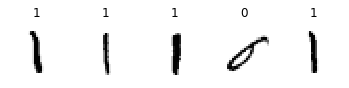

In [29]:
pick = np.random.randint(1,2115,5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test_01[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')